In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("facebook.csv")

In [4]:
df.head(4)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0


In [ ]:
# The describe() function returns various statistical measures from the dataset, as shown in the output below
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [ ]:
# Remove the 'userid' column from the dataset since it is not required for analysis
df.drop(columns=['userid'], inplace=True)

In [ ]:
# Identify and count missing values across the dataset
df.isna().sum()

age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [ ]:
# Clean the 'gender' column by removing missing entries to ensure data consistency
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [ ]:
# Clean the 'tenure' column by removing missing entries to ensure data consistency
df['tenure'] = df['tenure'].fillna(df['tenure'].median())

In [ ]:
# Verify that missing values have been handled correctly
df.isna().sum()

age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [ ]:
# Count the number of occurrences of each age in the dataset
age_count = df['age'].value_counts()
print(age_count)

age
18     5196
23     4404
19     4391
20     3769
21     3671
       ... 
87       42
112      18
111      18
110      15
109       9
Name: count, Length: 101, dtype: int64


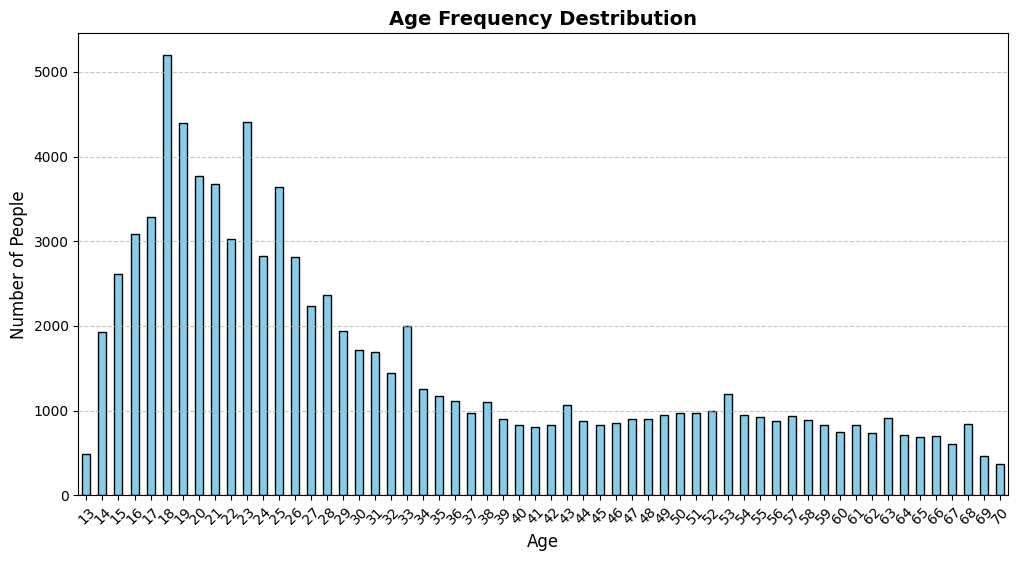

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
# Filter ages between 13 and 70, count occurrences of each age, sort by age, and plot as a bar chart
df[df['age'].between(13, 70)]['age'].value_counts().sort_index().plot(kind="bar", color='skyblue', edgecolor='black')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
# Set the title of the plo
plt.title('Age Frequency Destribution', fontsize=14,fontweight='bold')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Add horizontal grid lines to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Calculate the average friend_count for each age group
# Identify which age has the highest average friend_count
# Only consider records where age is between 13 and 70

df[df['age'].between(13, 70)].groupby('age')['friend_count'].mean()

age
13    164.750000
14    251.390130
15    347.692131
16    351.937135
17    350.300640
18    331.166282
19    333.692097
20    283.499071
21    235.941160
22    211.394789
23    202.842643
24    185.712062
25    131.021148
26    144.008171
27    134.147321
28    125.835448
29    120.818182
30    115.208042
31    118.459858
32    114.279972
33    103.863932
34    108.861575
35     99.329362
36    104.377460
37    101.357069
38    109.658781
39    100.819290
40     87.718563
41     96.892634
42     94.128144
43    100.458137
44     97.393387
45    103.880145
46    108.150411
47    106.983370
48    109.526786
49    104.773922
50    125.265010
51    101.566426
52    108.244221
53    112.287752
54    103.602524
55    112.968649
56    106.574032
57    110.138412
58    115.369541
59    102.291367
60    112.917112
61    118.118990
62    111.595109
63    126.716648
64    111.473907
65     97.401154
66    111.460882
67     88.408940
68    319.289598
69     95.084783
70     85.526027
Name: frie

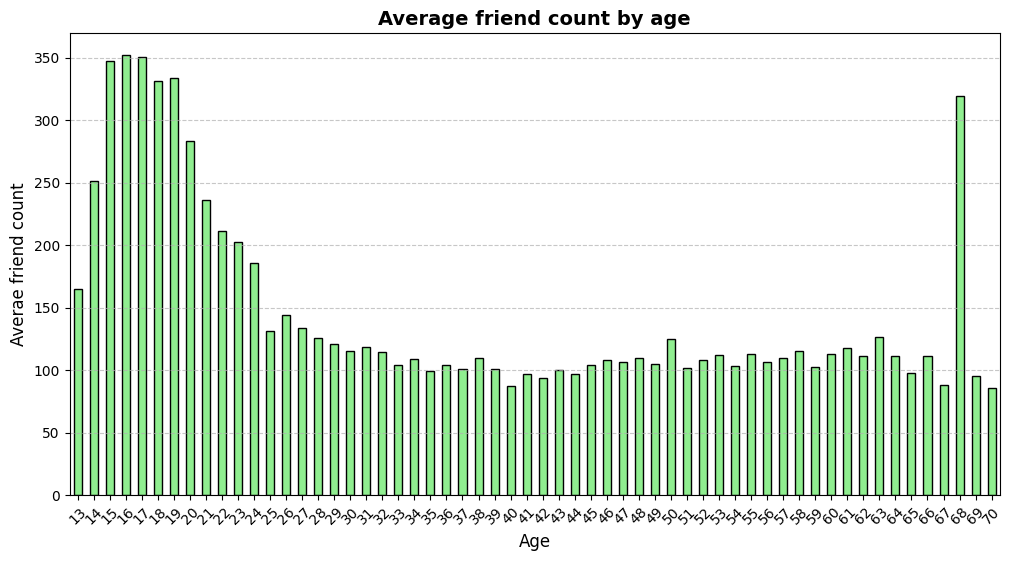

16


In [14]:
# Average friend_count by age group plot
age_friend = df[df['age'].between(13, 70)].groupby('age')['friend_count'].mean()

plt.figure(figsize=(12, 6))
age_friend.plot(kind='bar', color='lightgreen', edgecolor = 'black')
plt.title('Average friend count by age', fontsize = 14, fontweight = 'bold')
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Averae friend count', fontsize = 12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.show()
print(age_friend.idxmax())

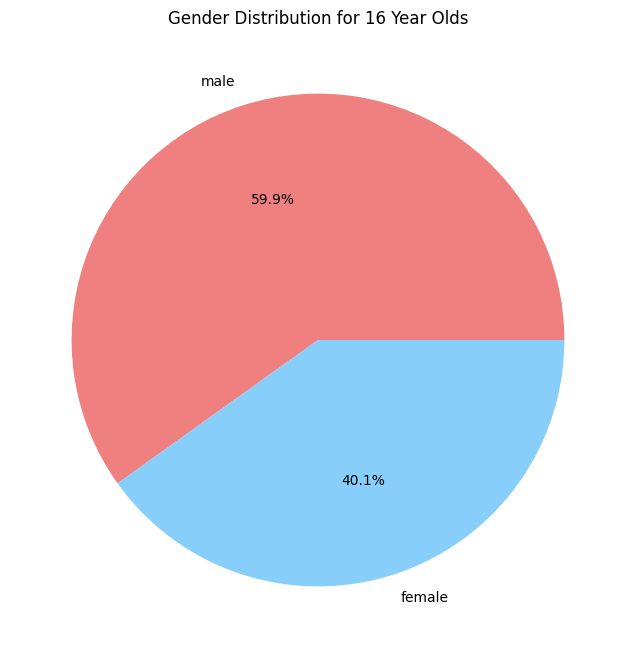

In [ ]:
# how many are male and female in the age of 16
df[df['age'] == 16]['gender'].value_counts()
# Visualize the distribution using a pie chart
gender_count = df[df['age']==16]['gender'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(gender_count, labels=gender_count.index,autopct='%1.1f%%',colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Gender Distribution for 16 Year Olds')
plt.show()

In [16]:
# Calculate the average number of likes for each age
# Determine the age group with the highest average likes
# Filter the dataset to include only users aged between 13 and 70
df[df['age'].between(13,70)].groupby('age')['likes'].mean()

age
13    201.059917
14    180.560000
15    226.168449
16    209.272521
17    231.693878
18    221.432063
19    200.949898
20    197.741045
21    153.319259
22    140.382916
23    134.356721
24    128.380969
25    118.778632
26    106.119361
27    100.773661
28    109.930203
29    104.479339
30    102.119464
31    127.402007
32     97.903673
33    133.257129
34    116.335720
35    113.645957
36    128.543828
37    116.467492
38    110.724295
39    141.064302
40    111.688623
41    123.605493
42    138.920958
43    139.514581
44    134.795895
45    136.061743
46    138.304348
47    197.951220
48    155.714286
49    162.869611
50    183.355072
51    163.435633
52    162.138693
53    166.279362
54    191.300736
55    155.484324
56    172.313212
57    183.484979
58    181.781635
59    163.756595
60    130.536096
61    123.657452
62    194.020380
63    177.853363
64    160.138223
65    157.116883
66    169.687055
67    162.548013
68    206.648936
69    140.080435
70    110.336986
Name: like

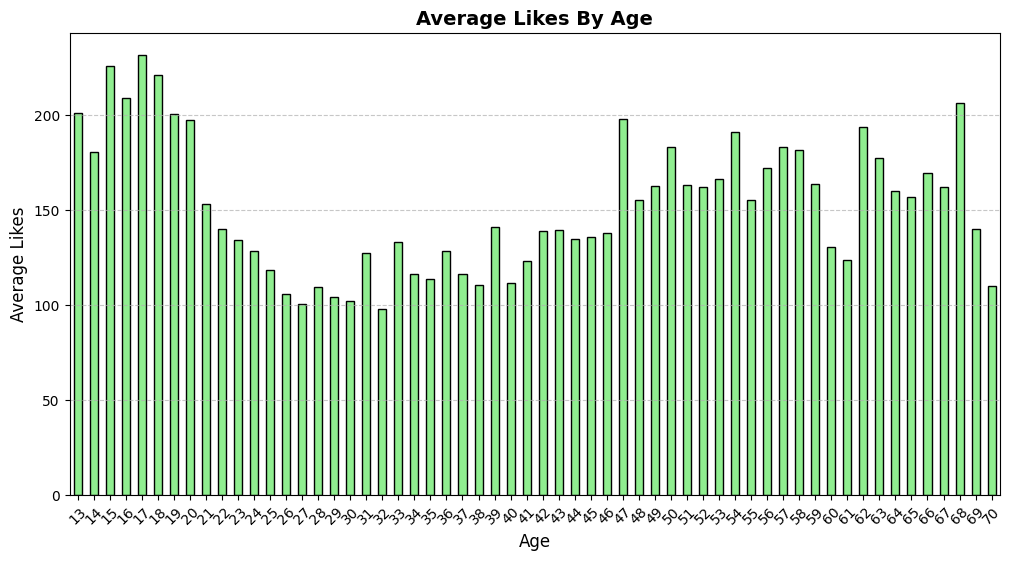

17


In [18]:
# Now we create the graph
age_like = df[df['age'].between(13,70)].groupby('age')['likes'].mean()
plt.figure(figsize=(12,6))
age_like.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Average Likes By Age", fontsize=14, fontweight='bold')
plt.xlabel('Age',fontsize=12)
plt.ylabel('Average Likes',fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print(age_like.idxmax())

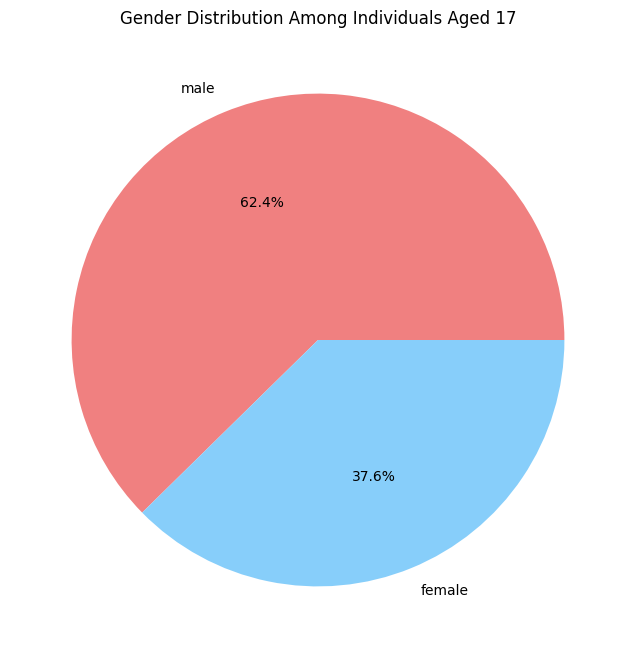

In [19]:
# Filter users who are 17 years old
# Calculate the number of male and female users in this age group
df[df['age']==17]['gender'].value_counts()
# Visualize the distribution using a pie chart
gender_counts = df[df['age']==17]['gender'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Gender Distribution Among Individuals Aged 17')
plt.show()




In [26]:
df['gender'].value_counts()

gender
male      58749
female    40254
Name: count, dtype: int64

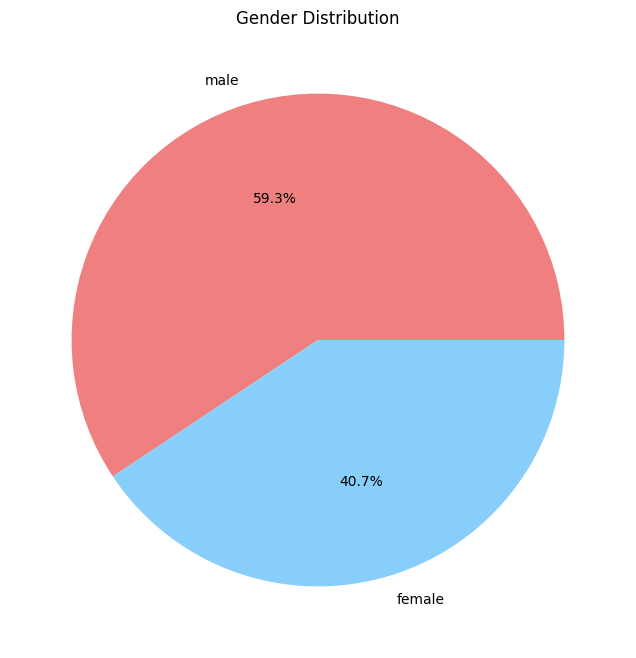

In [27]:
# Visualize the proportion of each category using a pie chart

gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(gender_counts, labels=gender_counts.index,autopct='%1.1f%%',colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Gender Distribution')
plt.show()